In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


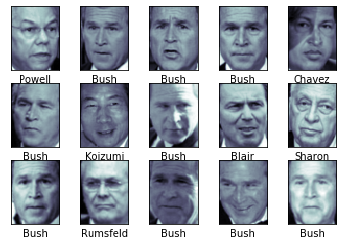

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]].split()[-1])

In [11]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target,test_size=0.25,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)

(1011, 2914)
(337, 2914)


In [12]:
n_components = 150
print("Extracting the top {} eigenfaces from {} faces".format(n_components,Xtrain.shape[0]))

Extracting the top 150 eigenfaces from 1011 faces


In [15]:
n_samples,h,w = faces.images.shape
print(h,w)

62 47


In [17]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(Xtrain)
eigenfaces = pca.components_.reshape((n_components,h,w))

C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [18]:
X_train = pca.transform(Xtrain)
X_test = pca.transform(Xtest)

In [21]:
from sklearn.model_selection import GridSearchCV
print('Fitting the classifier to the trainging set')
param_grid = {'C':[1e3,5e3,1e4,5e4,1e5],'gamma':[0.0001,0.0005,0.001,0.005,0.01,0.1]}
svc = SVC(kernel='rbf',class_weight='balanced')
grid = GridSearchCV(svc, param_grid)
grid = grid.fit(X_train,ytrain)
print(grid.best_estimator_)

Fitting the classifier to the trainging set
SVC(C=1000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [22]:
print(grid.best_params_)

{'C': 1000.0, 'gamma': 0.001}


In [23]:
yfit = grid.predict(X_test)

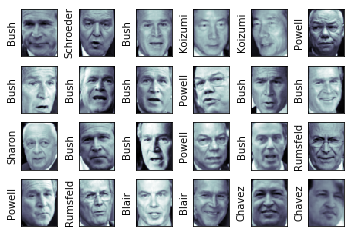

In [48]:
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(h,w),cmap='bone')
    axi.set(xticks=[],yticks=[],ylabel=faces.target_names[yfit[i]].split()[-1])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.80      0.75        15
     Colin Powell       0.81      0.87      0.84        68
  Donald Rumsfeld       0.77      0.77      0.77        31
    George W Bush       0.88      0.85      0.86       126
Gerhard Schroeder       0.90      0.83      0.86        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      0.92      0.92        12
       Tony Blair       0.85      0.93      0.89        42

         accuracy                           0.85       337
        macro avg       0.85      0.83      0.84       337
     weighted avg       0.85      0.85      0.85       337



In [35]:
import seaborn as sns

C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\DELL\Anaconda3\envs\tensorflow_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [44]:
def title(yfit, ytest, target_names, i):
    pred_name = target_names[yfit[i]].rsplit(' ',1)[-1]
    true_name = target_names[ytest[i]].rsplit(' ',1)[-1]
    return 'prediction {} true: {}'.format(pred_name, true_name)

In [45]:
prediction_titles= [title(yfit,ytest,faces.target_names,i) for i in range(yfit.shape[0])]